# AG3 - Actividad Guiada 3

**Nombre:** Victor Callejas Fuentes

**Asignatura:** 03MIAR - Algoritmos de Optimización

*Link:*  https://colab.research.google.com/drive/1NdL0zAOg8-TBH0XVcvk1WgfhWi3AXv-l?usp=sharing

*Github:*  


In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

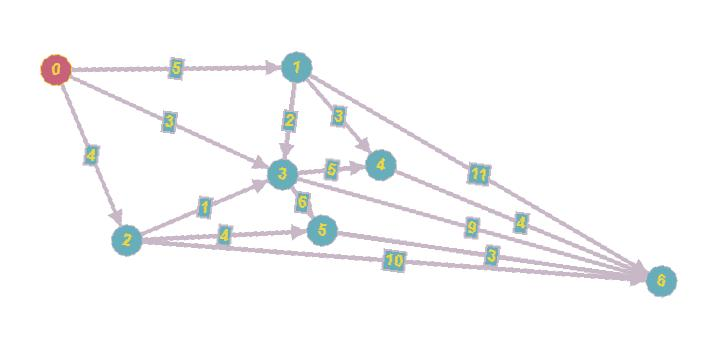

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [4]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [5]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

### Análisis de complejidad - Programación Dinámica

**Complejidad temporal:** O(n³)
- Tenemos tres bucles anidados que recorren los n nodos
- El bucle exterior recorre i desde 0 hasta n-1
- El segundo bucle recorre j desde i+1 hasta n
- El bucle interior recorre k desde i hasta j

**Complejidad espacial:** O(n²)
- Almacenamos dos matrices de tamaño n×n: PRECIOS y RUTA

La programación dinámica nos permite resolver este problema de forma eficiente guardando las soluciones de los subproblemas. Sin esta técnica, un enfoque de fuerza bruta tendría complejidad exponencial O(2^n).

##Problema de Asignacion de tarea

In [6]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [7]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [8]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [9]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [10]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [11]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


### Análisis de complejidad - Ramificación y Poda

**Complejidad temporal:** O(n! * n) en el peor caso
- En el peor caso debemos explorar todos los nodos del árbol de decisión
- El árbol tiene n! hojas (todas las permutaciones posibles)
- Sin embargo, la poda reduce significativamente el espacio de búsqueda

**Complejidad espacial:** O(n²)
- Almacenamos la lista de nodos activos
- En la práctica, la poda mantiene este número reducido

**Ventajas de la técnica:**
- La cota inferior (CI) nos permite descartar ramas no prometedoras
- La cota superior nos da una referencia de la mejor solución encontrada
- La poda elimina nodos cuya CI supera la mejor solución conocida

## Ampliación: Experimentación con Ramificación y Poda

Vamos a analizar el comportamiento del algoritmo con diferentes tamaños de problema y extraer conclusiones.

In [12]:
import time
import random

def generar_costes_aleatorios(n, min_val=5, max_val=50):
    """Genera una matriz de costes aleatorios de dimension n x n"""
    return [[random.randint(min_val, max_val) for _ in range(n)] for _ in range(n)]

#Experimentacion con diferentes dimensiones
dimensiones = [4, 5, 6, 7, 8]
resultados = []

print("Dimension | Iteraciones | Tiempo (s) | Solucion")
print("-" * 55)

for dim in dimensiones:
    COSTES_TEST = generar_costes_aleatorios(dim)
    
    inicio = time.time()
    
    #Version modificada para contar iteraciones
    DIMENSION = len(COSTES_TEST)
    MEJOR_SOLUCION = tuple(i for i in range(DIMENSION))
    CotaSup = valor(MEJOR_SOLUCION, COSTES_TEST)
    
    NODOS = []
    NODOS.append({'s': (), 'ci': CI((), COSTES_TEST)})
    
    iteracion = 0
    
    while len(NODOS) > 0:
        iteracion += 1
        nodo_prometedor = [min(NODOS, key=lambda x: x['ci'])][0]['s']
        
        HIJOS = [{'s': x['s'], 'ci': CI(x['s'], COSTES_TEST)} for x in crear_hijos(nodo_prometedor, DIMENSION)]
        
        NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION]
        if len(NODO_FINAL) > 0:
            if NODO_FINAL[0]['ci'] < CotaSup:
                CotaSup = NODO_FINAL[0]['ci']
                MEJOR_SOLUCION = NODO_FINAL
        
        HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]
        NODOS.extend(HIJOS)
        NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]
    
    tiempo = time.time() - inicio
    resultados.append((dim, iteracion, tiempo))
    print(f"    {dim}     |     {iteracion:4d}    |   {tiempo:.4f}   | {MEJOR_SOLUCION}")

print("\n" + "=" * 55)

Dimension | Iteraciones | Tiempo (s) | Solucion
-------------------------------------------------------
    4     |       10    |   0.0001   | [{'s': (2, 1, 3, 0), 'ci': 105}]
    5     |       53    |   0.0003   | [{'s': (0, 3, 1, 2, 4), 'ci': 87}]
    6     |      165    |   0.0015   | [{'s': (2, 1, 3, 5, 4, 0), 'ci': 80}]
    7     |      133    |   0.0014   | [{'s': (1, 6, 4, 2, 0, 5, 3), 'ci': 84}]
    8     |      650    |   0.0177   | [{'s': (7, 2, 3, 6, 0, 1, 5, 4), 'ci': 87}]



### Conclusiones de la experimentación

**Observaciones:**
1. El numero de iteraciones crece de forma factorial con la dimension del problema
2. La poda reduce significativamente el espacio de busqueda respecto a fuerza bruta
3. El tiempo de ejecucion depende de la calidad de las cotas utilizadas

**Mejoras posibles:**
- Utilizar heuristicas mejores para calcular la cota inferior
- Implementar una estrategia de seleccion de nodos mas sofisticada
- Paralelizar la exploracion de ramas independientes

**Comparativa con fuerza bruta:**
- Para n=8, fuerza bruta exploraria 8! = 40320 permutaciones
- Ramificacion y poda explora muchas menos gracias a la eliminacion de ramas no prometedoras

##Descenso del gradiente

In [13]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [14]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

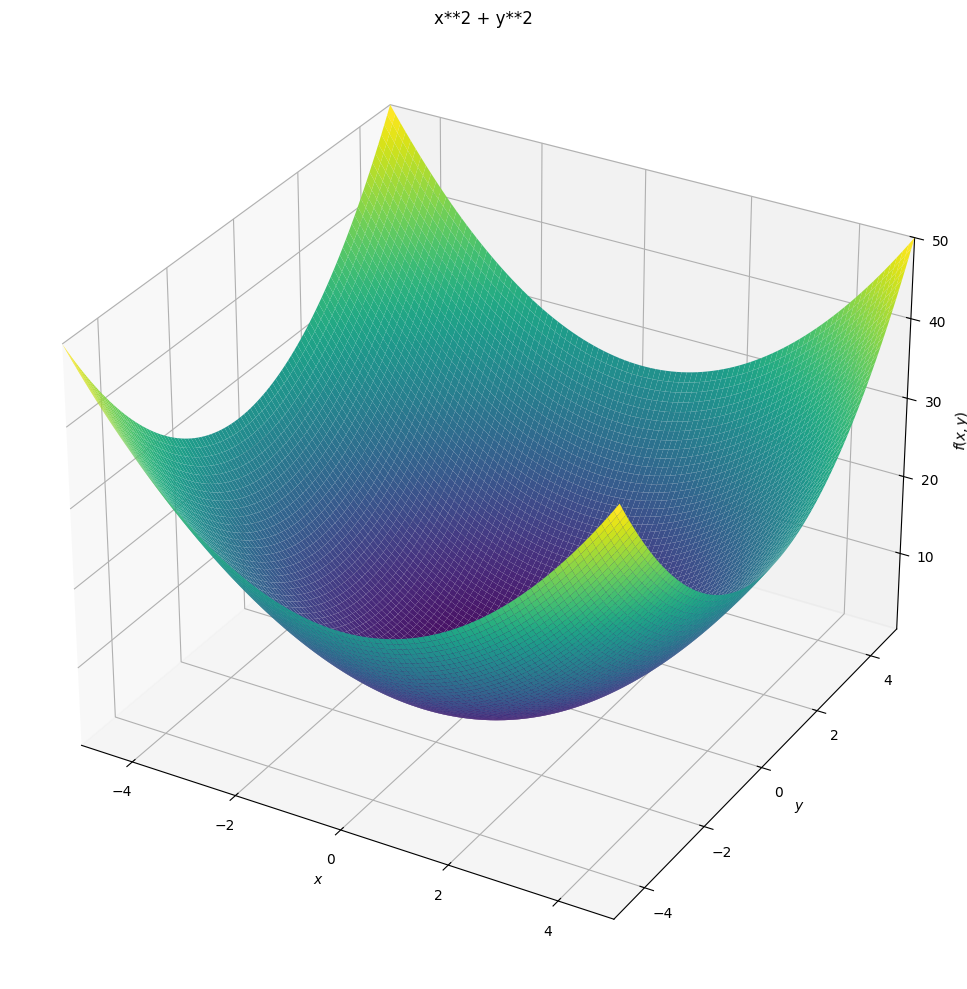

In [15]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

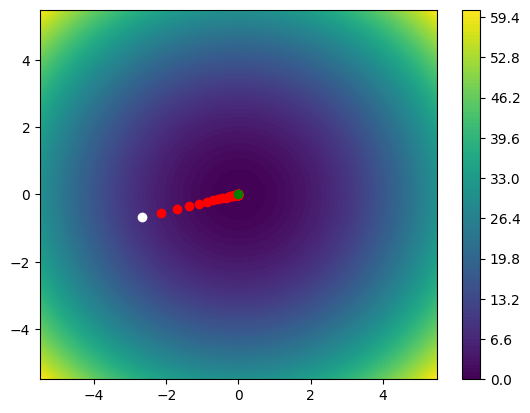

Solucion: [-3.8090435766047103e-05, -9.58488844958383e-06] 1.542751383438326e-09


In [16]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


### Análisis de complejidad - Descenso del Gradiente

**Complejidad temporal:** O(k * n)
- k = numero de iteraciones
- n = dimension del vector de entrada (en este caso n=2)
- En cada iteracion calculamos el gradiente y actualizamos la posicion

**Complejidad espacial:** O(n)
- Solo almacenamos el punto actual y el gradiente

**Observaciones:**
- El algoritmo es muy eficiente por iteracion
- El numero de iteraciones necesarias depende de la tasa de aprendizaje y la forma de la funcion
- Converge a minimos locales, no necesariamente al minimo global

## Entrega Opcional: Descenso del Gradiente - Función compleja

Vamos a optimizar la funcion:

$$f(x,y) = \sin\left(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3\right) \cdot \cos\left(2x + 1 - e^y\right)$$

Esta funcion tiene multiples minimos y maximos locales, lo que hace interesante su optimizacion.

In [17]:
# Definimos la funcion
# f(x,y) = sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)

f_extra = lambda X: math.sin(0.5 * X[0]**2 - 0.25 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

# Gradiente calculado analiticamente
# df/dx = x*cos(x^2/2 - y^2/4 + 3)*cos(2x + 1 - e^y) - 2*sin(x^2/2 - y^2/4 + 3)*sin(2x + 1 - e^y)
# df/dy = -y/2*cos(x^2/2 - y^2/4 + 3)*cos(2x + 1 - e^y) + e^y*sin(x^2/2 - y^2/4 + 3)*sin(2x + 1 - e^y)

def df_extra(X):
    x, y = X[0], X[1]
    
    u = 0.5 * x**2 - 0.25 * y**2 + 3
    v = 2*x + 1 - math.exp(y)
    
    sin_u = math.sin(u)
    cos_u = math.cos(u)
    sin_v = math.sin(v)
    cos_v = math.cos(v)
    
    # Derivada parcial respecto a x
    df_dx = x * cos_u * cos_v - 2 * sin_u * sin_v
    
    # Derivada parcial respecto a y
    df_dy = -0.5 * y * cos_u * cos_v + math.exp(y) * sin_u * sin_v
    
    return [df_dx, df_dy]

print("Gradiente en (0,0):", df_extra([0, 0]))

Gradiente en (0,0): [-0.0, 0.0]


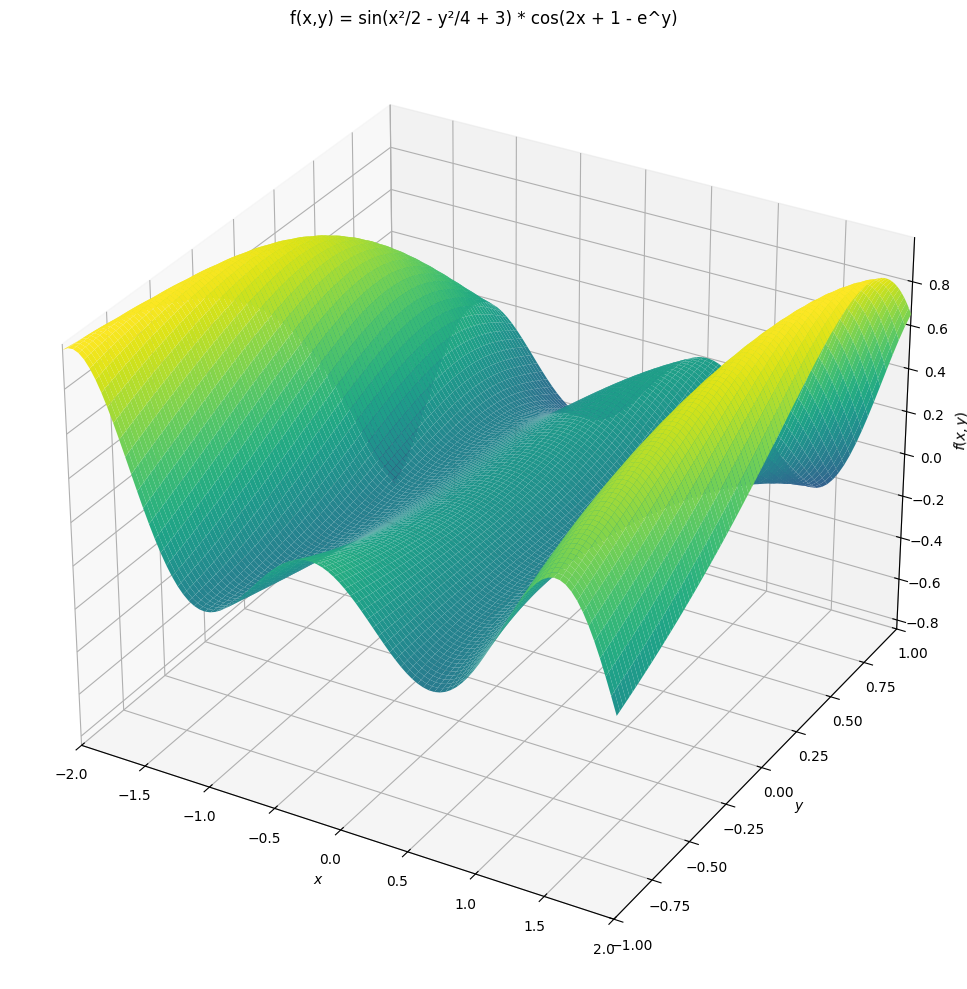

In [18]:
# Visualizacion de la funcion
from sympy import symbols, sin, cos, exp
from sympy.plotting import plot3d

x, y = symbols('x y')
plot3d(sin(0.5*x**2 - 0.25*y**2 + 3) * cos(2*x + 1 - exp(y)),
       (x, -2, 2), (y, -1, 1),
       title='f(x,y) = sin(x²/2 - y²/4 + 3) * cos(2x + 1 - e^y)',
       size=(10, 10))

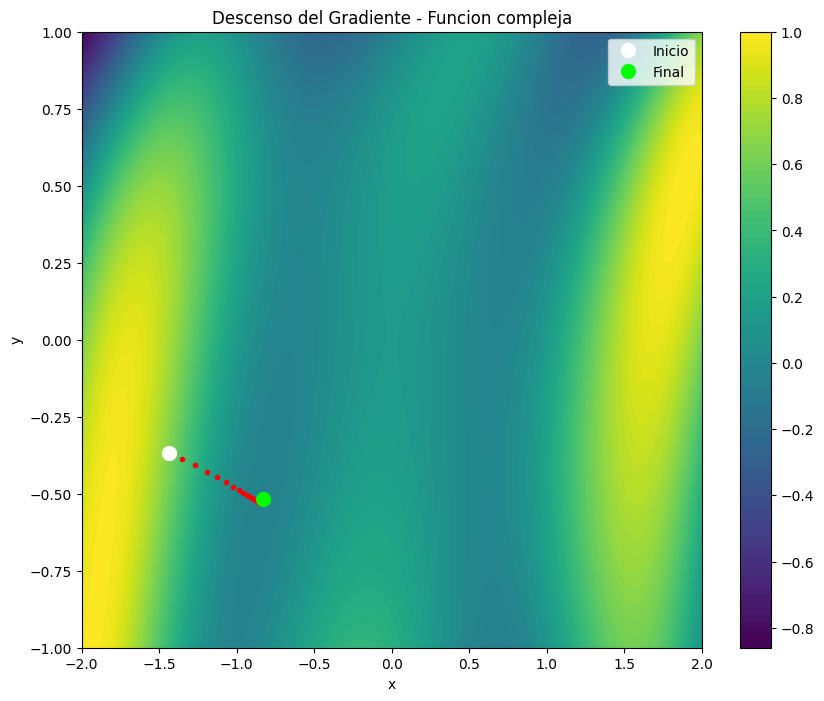

Punto inicial: (-1.4333983119131148, -0.3676948272744285)
Punto final: [-0.8288756684242545, -0.5161134418414285]
Valor de f en el punto final: -0.04195516601471994


In [19]:
# Descenso del gradiente para la funcion extra

# Preparamos la visualizacion
resolucion = 100
rango_x = 2
rango_y = 1

X = np.linspace(-rango_x, rango_x, resolucion)
Y = np.linspace(-rango_y, rango_y, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, xv in enumerate(X):
    for iy, yv in enumerate(Y):
        Z[iy, ix] = f_extra([xv, yv])

# Pintamos el mapa de niveles
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, resolucion, cmap='viridis')
plt.colorbar()

# Punto inicial aleatorio
P = [random.uniform(-1.5, 1.5), random.uniform(-0.5, 0.5)]
plt.plot(P[0], P[1], "o", c="white", markersize=10, label="Inicio")

# Tasa de aprendizaje adaptativa
TA = 0.05

# Guardamos la trayectoria
trayectoria_x = [P[0]]
trayectoria_y = [P[1]]

# Iteraciones
for i in range(100):
    grad = df_extra(P)
    
    # Actualizamos la posicion
    P[0] = P[0] - TA * grad[0]
    P[1] = P[1] - TA * grad[1]
    
    # Limitamos los valores para evitar overflow
    P[0] = max(-rango_x, min(rango_x, P[0]))
    P[1] = max(-rango_y, min(rango_y, P[1]))
    
    trayectoria_x.append(P[0])
    trayectoria_y.append(P[1])
    
    plt.plot(P[0], P[1], "o", c="red", markersize=3)

# Punto final
plt.plot(P[0], P[1], "o", c="lime", markersize=10, label="Final")
plt.legend()
plt.title("Descenso del Gradiente - Funcion compleja")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("Punto inicial:", (trayectoria_x[0], trayectoria_y[0]))
print("Punto final:", P)
print("Valor de f en el punto final:", f_extra(P))

### Análisis del Descenso del Gradiente en la función compleja

**Observaciones:**
1. La funcion tiene multiples minimos y maximos locales debido a la combinacion de seno y coseno
2. El resultado final depende del punto de inicio (sensibilidad a condiciones iniciales)
3. La tasa de aprendizaje debe ser pequeña para evitar oscilaciones

**Dificultades encontradas:**
- El termino exponencial $e^y$ crece rapidamente, lo que puede causar overflow
- La funcion tiene un comportamiento muy oscilante, dificultando la convergencia
- Diferentes puntos de inicio llevan a diferentes minimos locales

**Mejoras aplicadas:**
- Limitacion del rango de busqueda para evitar overflow
- Tasa de aprendizaje pequeña para garantizar convergencia
- Mayor numero de iteraciones para permitir exploracion